In [1]:
import pandas as pd
data = pd.read_csv('./order-2.csv',encoding='gbk',parse_dates=["成交时间"]) # parse_dates 将数据解析为时间格式
data=data.dropna()
data.head() # 预览数据
data.info() # 查看源数据类型

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3478 entries, 0 to 3477
Data columns (total 7 columns):
商品ID    3478 non-null int64
类别ID    3478 non-null int64
门店编号    3478 non-null object
单价      3478 non-null float64
销量      3478 non-null float64
成交时间    3478 non-null datetime64[ns]
订单ID    3478 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 217.4+ KB


In [2]:
data.groupby('类别ID')['销量'].sum().reset_index()

,类别ID,销量
0,910000000,24.0
1,910010000,7.0
2,910010002,1.0
3,910010101,6.0
4,910010301,2.0
5,910010400,1.0
6,910010500,4.0
7,910020000,10.0
8,910020102,1.0
9,910020104,31.0


## 哪些类别的商品比较畅销

In [9]:
data.groupby('类别ID')['销量'].sum().reset_index().sort_values(by='销量',ascending=False).head(10)

,类别ID,销量
240,922000003,425.328
239,922000002,206.424
251,923000006,190.294
216,915030104,175.059
238,922000001,121.355
367,960000000,121.000
234,920090000,111.565
249,923000002,91.847
237,922000000,86.395
247,923000000,85.845


## 哪些商品比较畅销

In [11]:
pd.pivot_table(data,index='商品ID',values="销量",aggfunc="sum").reset_index().sort_values(by='销量',ascending=False).head(10)

,商品ID,销量
8,29989059,391.549
18,29989072,102.876
469,30022232,101.000
523,30031960,99.998
57,29989157,72.453
476,30023041,64.416
505,30026255,62.375
7,29989058,56.052
510,30027007,48.757
903,30171264,45.000


## 不同门店的销售额占比

In [12]:
data['销售额'] = data ['销量']*data['单价']
data.groupby('门店编号')['销售额'].sum()


门店编号
CDLG    10908.82612
CDNL     8059.47867
CDXL     9981.76166
Name: 销售额, dtype: float64

In [13]:
data.groupby('门店编号')['销售额'].sum()/data['销售额'].sum()

门店编号
CDLG    0.376815
CDNL    0.278392
CDXL    0.344792
Name: 销售额, dtype: float64

## 绘制饼图

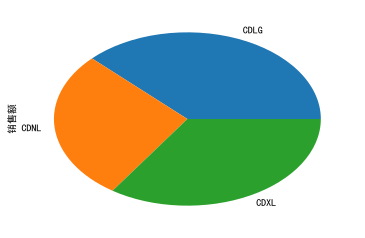

In [42]:
import matplotlib.pyplot as plot

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']

# 解决负号无法正常显示的问题
plt.rcParams['axes.unicode_minus'] = False

# 将图表设置成矢量图格式显示
% config InlineBackend.figure_format = 'svg'
(data.groupby('门店编号')['销售额'].sum()/data['销售额'].sum()).plot.pie()
#plot.pie((data.groupby('门店编号')['销售额'].sum()/data['销售额'].sum()).reset_index()['销售额'],labels=data.groupby('门店编号')['销售额'].sum().reset_index()['门店编号'])

## 哪些时间段是超市的客流高峰

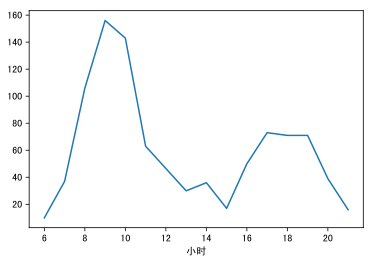

In [50]:
# 提取小时数
data['小时'] = data['成交时间'].map(lambda x :int(x.strftime("%H")))
# 对小时和订单去重
traffic = data[['小时','订单ID']].drop_duplicates()
# 求每小时客流量
traffic.groupby('小时')['订单ID'].count()
# 绘制每小时客流量折线图
traffic.groupby('小时')['订单ID'].count().plot()